In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [100]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
!mkdir /content/drive/MyDrive/logistic_data

mkdir: cannot create directory ‘/content/drive/MyDrive/logistic_data’: File exists


In [102]:
%cd /content/drive/MyDrive/logistic_data #%cd logistic_data/ #changing_directory

[Errno 2] No such file or directory: '/content/drive/MyDrive/logistic_data #%cd logistic_data/ #changing_directory'
/content


In [103]:
!pwd

/content


In [104]:
!ls

drive  sample_data


In [105]:
train_path = '/content/drive/MyDrive/logistic_data/emnist-letters-train.csv'
test_path ='/content/drive/MyDrive/logistic_data/emnist-letters-test.csv' 
train = pd.read_csv(train_path)
train = train.iloc[0:2500, :]
print(train)


      23  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.406  0.407  0.408  \
0      7  0    0    0    0    0    0    0    0    0  ...    0.0    0.0    0.0   
1     16  0    0    0    0    0    0    0    0    0  ...    0.0    0.0    0.0   
2     15  0    0    0    0    0    0    0    0    0  ...    0.0    0.0    0.0   
3     23  0    0    0    0    0    0    0    0    0  ...    0.0    0.0    0.0   
4     17  0    0    0    0    0    0    0    0    0  ...    0.0    0.0    0.0   
...   .. ..  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...    ...   
2495  21  0    0    0    0    0    0    0    0    0  ...    0.0    0.0    0.0   
2496   4  0    0    0    0    0    0    0    0    0  ...    0.0    0.0    0.0   
2497   5  0    0    0    0    0    0    0    0    0  ...    0.0    0.0    0.0   
2498   7  0    0    0    0    0    0    0    0    0  ...    0.0    0.0    0.0   
2499   8  0    0    0    0    0    0    0    0    0  ...    0.0    0.0    0.0   

      0.409  0.410  0.411  

In [106]:
train_X = train.iloc[:,1:]
u = np.ones([np.shape(train_X)[0], 1])
train_X = np.concatenate((u, train_X), axis = 1)
print(np.shape(train_X))

(2500, 785)


In [107]:
train_Y = train.iloc[:,0]
ynew = np.zeros([np.size(train_Y),len(set(train_Y))])
for i in range(0,np.size(train_Y)):
   for j in range(1, len(set(train_Y))+1):
     if train_Y[i] == j:
       ynew[i, j-1] = 1
print(ynew)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [108]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))

In [109]:
def grad(X, Y, learningrate, itrn):
  m = np.shape(X)[0] # training set length

  theta = np.zeros( (X.shape[1] , 26) ) # initializing theta
  
  cost_all = [] # to store cost Function

  for z in range(itrn): 

      x = np.dot(X, theta) # hypothesis

      yprobability = sigmoid(x)

      cost = (1/m)*np.sum((-Y*np.log(yprobability)) - ((1-Y)*np.log(1-yprobability))) # Cost Function

      dif = (1/m)* np.dot(X.T, yprobability - Y) # differentiating Cost Function w.r.t Theta

      theta = theta - learningrate*dif # updating theta

      cost_all.append(cost) # updating cost Function list


      # to see if cost is decreasing

      if (z % (itrn/10)  == 0):
        print("Cost is", cost)

  return yprobability , cost_all

In [110]:
itrn = 5000
learningrate = 0.00002

In [111]:
yprobability , cost_all = grad(Y= ynew, X=train_X , learningrate=learningrate, itrn = itrn)

Cost is 18.02182669455858
Cost is 1.4235725769634735
Cost is 1.2009013222977374
Cost is 1.0621219299484095
Cost is 0.9612397273661862
Cost is 0.8825463586086202
Cost is 0.8184764276738915
Cost is 0.7647913130413949
Cost is 0.718879050917607
Cost is 0.6790112503663177


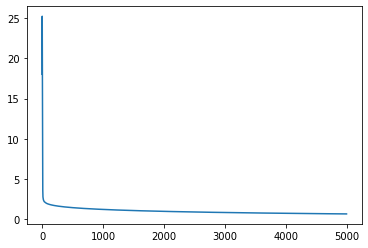

In [112]:
plt.plot(np.arange(itrn), cost_all)

In [113]:
print((yprobability))

[[1.83116057e-04 1.40903440e-08 3.56222690e-05 ... 3.65414938e-11
  1.83075766e-15 6.07523586e-16]
 [4.35088838e-07 9.54025732e-03 1.71445873e-05 ... 8.46962644e-09
  6.37381004e-07 1.33644933e-03]
 [1.54387363e-03 5.65922704e-07 6.38961832e-02 ... 3.09406246e-09
  6.74997407e-20 8.11273293e-04]
 ...
 [1.33701670e-03 1.35119988e-05 3.00461311e-06 ... 1.11196992e-10
  1.18756184e-18 6.31201652e-10]
 [4.00468191e-06 1.61049117e-04 1.85864437e-07 ... 6.22400176e-04
  7.85457842e-10 1.18285044e-02]
 [3.45852425e-05 2.96241242e-05 1.76758771e-09 ... 1.12516854e-04
  1.80998295e-07 5.51040431e-07]]


In [114]:
for i in range(np.shape(yprobability)[0]):
  for j in range(np.shape(yprobability)[1]):
    if yprobability[i][j] < 0.5:
      yprobability[i][j] = False
    else:
      yprobability[i][j] = True
yprobability

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [115]:
error = (1/train_X.shape[0])*np.sum(np.abs(yprobability - ynew))
print(error*100 , "%")

15.960000000000003 %
